# I. Introduction and Load DataSet

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, f1_score, accuracy_score, confusion_matrix, classification_report
import warnings    
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

import lime
import lime.lime_tabular

from sklearn.naive_bayes import GaussianNB
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

#smote - Tạo thêm dữ liệu để cân bằng 
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import unidecode
pd.set_option('display.max_rows', None)  # Hiển thị tất cả các hàng
pd.set_option('display.max_columns', None)  # Hiển thị tất cả các cột
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [171]:
# Your task 
#Group the appraisers (purple) into a group so that there are about 10-15 people
#reviewers (purple) must attend as few group meetings as possible, and they must share the same number of people being evaluated (just need to share as many as possible)

#The evaluator is not mixed in, but is also included in the list of the person being evaluated

In [202]:
df = pd.read_csv('C:\\Users\\namqt\\05.Project\\Group.csv')

In [204]:
df.drop(columns = ['Group_Thuy','Group'], inplace = True)

In [205]:
df.columns = ['ID_0', 'Name_0','Working_Location_0','CC_0','ID_1','Name_1','Working_Location_1','CC_1']

In [206]:
df

,ID_0,Name_0,Working_Location_0,CC_0,ID_1,Name_1,Working_Location_1,CC_1
0,219934,Vũ Thị Thúy Nga,NaN,37950100 Admin General,200213,Đào Thị Hợp,NaN,37953209 Global Sourcing
1,217238,Vũ Thị Luân,NaN,37924000 Production General,220408,Bùi Quang Sáng,NaN,37955100 Building
2,217238,Vũ Thị Luân,NaN,37924000 Production General,202123,Trần Chung Hiếu,NaN,37955100 Building
3,217238,Vũ Thị Luân,NaN,37924000 Production General,135093,Nguyễn Thanh Nga,NaN,37924000 Production General
4,217238,Vũ Thị Luân,NaN,37924000 Production General,200382,Vũ Minh Tú,NaN,37955100 Building
...,...,...,...,...,...,...,...,...
530,200605,Phạm Thu Huyền,VS4,37921000 Quality Management,200432,Dương Đình Việt,Incoming,37921000 Quality Management
531,200605,Phạm Thu Huyền,VS4,37921000 Quality Management,218144,Đỗ Xuân Thắng,Incoming,37921000 Quality Management
532,200605,Phạm Thu Huyền,VS4,37921000 Quality Management,135294,Dương Văn Hưng,VS5,37921000 Quality Management
533,200605,Phạm Thu Huyền,VS4,37921000 Quality Management,216832,Lê Hoàng Nam,VS4,37921000 Quality Management


In [207]:
df_count = df.groupby('ID_0')['ID_1'].nunique().reset_index(name = 'unique_ID1_count')

In [210]:
wcss =[]
for k in range(1,21):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_count[['unique_ID1_count']])
    wcss.append(kmeans.inertia_)

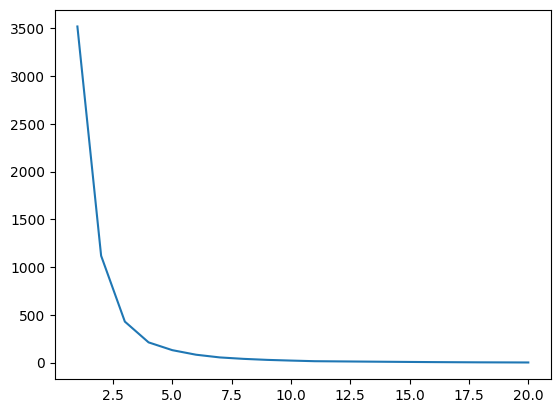

In [212]:
plt.plot(range(1, 21), wcss)

In [213]:
k = 5
kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)

In [214]:
df_count['Group'] = kmeans.fit_predict(df_count[['unique_ID1_count']])
df = df.merge(df_count[['ID_0','Group']], on = 'ID_0', how = 'left')

In [220]:
result = df.groupby('Group').agg({
    'ID_0': lambda x: list(x.unique()),
    'ID_1':lambda x: list(x.unique())
}).reset_index()
result

,Group,ID_0,ID_1
0,0,"[135013, 202319, 222152, 217149, 215516, 223683, 135128, 135274, 135024, 200820, 21764700, 135034, 200605]","[135108, 220408, 200213, 135413, 202123, 200382, 218072, 222339, 215517, 135417, 200791, 135272, 218417, 219909, 200703, 135134, 222628, 220409, 200212, 223628, 135041, 135168, 135109, 218144, 135064, 218394, 217150, 200432, 135621, 218210, 135245, 202624, 221701, 13502800, 220916, 219955, 135069, 135214, 222152, 223232, 201404, 20186000, 135128, 21808801, 135294, 216832, 216514, 200702, 135227, 135213, 201494, 220492, 223324, 135051, 135093, 217371, 220328, 220493, 135270, 135024, 21764700, 135112, 214761, 219141]"
1,1,"[219934, 217238, 218241, 135064, 135319, 200380, 200770, 201404, 135008, 135003, 135026, 135264, 135355, 214761, 135215, 220408, 21808801, 202123, 200382, 135415, 135112, 219141, 211995, 223232, 218144, 200702, 135216, 135109, 135043, 135088]","[200213, 220408, 202123, 135093, 200382, 135109, 218144, 135214, 135069, 222152, 222153, 13546400, 135128, 21808801, 220493, 210484, 135051, 135108, 220410, 223628, 217371, 135245, 135413, 202624, 221701, 135041, 200703, 135168, 200702, 217150, 135033, 218241, 216736, 200432, 135319, 200770, 200791]"
2,2,"[135214, 135417, 201965, 135012]","[135064, 135621, 218210, 135270, 135213, 201494, 219955, 220492, 220916, 223324, 13502800, 217150, 218394, 135093, 135245, 135413, 202624, 209333, 221701, 223232, 135168, 135109, 200432, 218144, 222339, 218072, 219909, 135112, 214761, 13546400, 200382, 202123, 220408, 135069, 135214, 222152, 135088, 135041, 200703, 135024, 21764700, 200380, 201404, 210484, 218417, 219141, 135272, 135417, 215517, 220409, 20186000, 135128, 21808801, 135294, 216832, 223628, 200702, 221793]"
3,3,"[135270, 135142, 135621, 220328, 135069, 221539, 215517, 200212, 13546400, 135018, 224387, 220493, 135434, 212189, 200432]","[202123, 222152, 135214, 135069, 21808801, 135128, 220408, 200382, 220328, 218241, 222153, 200791, 135227, 135212, 200702, 21764700, 135024, 135621, 201404, 200770, 218210, 135064, 200432, 220493, 135134, 135319, 135033, 217371, 200380, 216736, 135413, 221701, 135245, 202624, 135168, 135109, 218144, 200213, 135051, 135108, 222339, 218072, 135294, 216832, 223628, 135041, 200703, 220409, 135088, 209333, 223232, 218394, 217150, 135112, 214761, 13546400, 210484, 218417, 221793, 135093, 135272, 135270]"
4,4,"[218245, 220353, 220813, 135272, 135057]","[222153, 200791, 135227, 135212, 135270, 135051, 216736, 135134, 21764700, 135024, 218144, 200432, 135109, 200702, 200770, 135319, 135033, 135213, 220492, 135272, 219909, 218072, 135088, 210484, 219955, 223324, 135417, 215517, 220409, 20186000, 13546400, 223628, 209333, 223232, 135168, 135112, 214761, 219141, 13502800, 222339, 218241, 201494, 220916, 200213, 200382, 202123, 220408, 135128, 21808801, 135294, 216832, 135245, 135413, 202624, 221701, 200703, 135041, 200212, 218394, 217150]"


In [222]:
df = df.sort_values('Group', ascending = True)
df = df[df['ID_0'] != df['ID_1']]

In [227]:
df

,ID_0,Name_0,Working_Location_0,CC_0,ID_1,Name_1,Working_Location_1,CC_1,Group
534,200605,Phạm Thu Huyền,VS4,37921000 Quality Management,223628,Phạm Thị Bích,VS4,37921000 Quality Management,0
378,135128,Phạm Thị Ngà,NaN,37928200 Production Automotive blowers,200432,Dương Đình Việt,Incoming,37921000 Quality Management,0
377,135128,Phạm Thị Ngà,NaN,37928200 Production Automotive blowers,135109,Trần Thị Thu Trang,Incoming,37921000 Quality Management,0
376,135128,Phạm Thị Ngà,NaN,37928200 Production Automotive blowers,135168,Nguyễn Thị Mai Phương,QA,37921000 Quality Management,0
375,135128,Phạm Thị Ngà,NaN,37928200 Production Automotive blowers,221701,Phạm Thị Liên,QMS,37921000 Quality Management,0
...,...,...,...,...,...,...,...,...,...
114,220813,Ngô Văn Độ,NaN,37950100 Admin General,219141,Đặng Thị Mơ,VS5VS7,37922300 Process Engineering,4
113,220813,Ngô Văn Độ,NaN,37950100 Admin General,214761,An Nam Trang,VS7,37922300 Process Engineering,4
112,220813,Ngô Văn Độ,NaN,37950100 Admin General,135112,Ngô Thị Huyền,VS7,37922300 Process Engineering,4
125,220813,Ngô Văn Độ,NaN,37950100 Admin General,220409,Nguyễn Đức Ước,KOMAX,37922500 Plant Maintenance,4


In [230]:
df.to_csv('Group_Final.csv')
result.to_csv('Group by list.csv')
df[['ID_0','ID_1','Group']].to_csv('Group by ID.csv')

,ID_0,ID_1,Group
534,200605,223628,0
378,135128,200432,0
377,135128,135109,0
376,135128,135168,0
375,135128,221701,0
...,...,...,...
114,220813,219141,4
113,220813,214761,4
112,220813,135112,4
125,220813,220409,4
